In [16]:
from tensorflow import keras as k
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [9]:
model = k.models.load_model('model_veoneer.h5')

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 114, 114, 32)      896       
                                                                 
 batch_normalization_21 (Bat  (None, 114, 114, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 57, 57, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_22 (Bat  (None, 57, 57, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 57, 57, 64)        18496     
                                                      

In [35]:
model.input_shape

(None, 227, 227, 3)

In [15]:
import sounddevice as sd
import math
from time import sleep
from PIL import Image


In [43]:
def convert_to_probabilities(predicted_values):
    exp_values = [math.exp(val) for val in predicted_values]
    sum_exp_values = sum(exp_values)
    probabilities = [val / sum_exp_values for val in exp_values]
    return probabilities

In [17]:
def data2fftimge(data, desired_size=(227,227)):
    _,_,_,img = plt.specgram(data.flatten(),NFFT=256,Fs=44100,scale_by_freq=False, noverlap=64)

    img_2d = img.make_image(None)[0][...,0:3]

    img_resized = Image.fromarray(img_2d).resize(desired_size)

    img_tensor = tf.convert_to_tensor(np.array(img_resized))

    return img_tensor


In [18]:
def preprocess_image(image):
    image = tf.image.per_image_standardization(image)

    return image

In [74]:
fs = 44100
duration = 2 # seconds
print ("Recording in 2...")
sleep(1)
print ("Recording in 1...")
sleep(1)
print ("Recording...")
val = sd.rec(frames=fs*duration, samplerate=fs, channels=1)
sd.wait()
print ("Recording...Done")

Recording in 2...
Recording in 1...
Recording...
Recording...Done


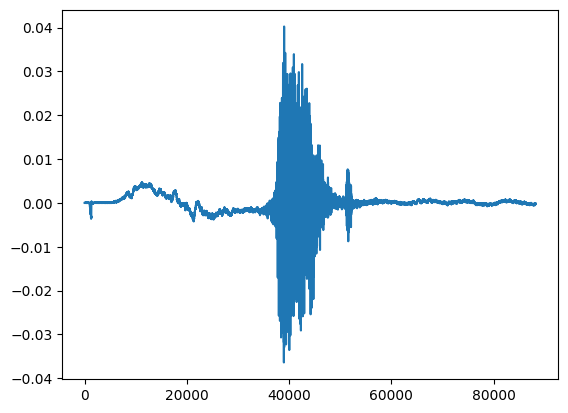

In [75]:
plt.plot(val)

(1, 227, 227, 3)
1/1 [==============================] - 0s 58ms/step
[0.2243661120654507, 0.5262215578972413, 0.2494123300373081]


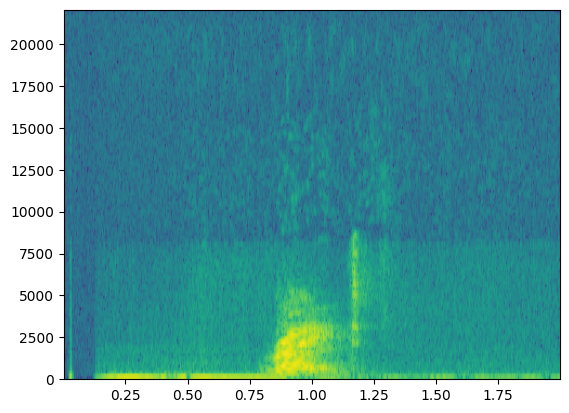

In [76]:

image = data2fftimge(val)
image = preprocess_image(image)
image = np.expand_dims(image,axis=0)
print(image.shape)
pred = model.predict(image,batch_size=1)
print(convert_to_probabilities(pred[0]))